# Curve Fitting

In this Jupyter notebook we are going to to implement curve fitting for different degrees of polynomial functions of the kind:

$$y=\sum_i \theta_i x^i\tag{1}$$

Where $x$ is the independent variable and $\theta$ are the polynomial parameters. We are going to fit this curves using only the numpy library in python.

Firstly let us import the needed modules and set plot options:

In [1]:
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style 
import matplotlib as mpl 

#Set default figure size
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 

Now we will create our polynomial function defined above. We will also create an additional function which adds some normal noise to the polynomial function:

$$y=\sum_i (\theta_i x^i + \Delta n_i) \tag{2}$$

where $\Delta n_i$ is the normal noise added to each term of the polynomial function.

In [2]:
def polyModel(x,theta):
    '''
    Returns value of function y defined in equation 1
    x: numpy array of x values
    theta: parameters of the polynomial
    sigma: standard deviation of the noise distribution that is added to the polynomial function
    '''
    y=[]                                          # initialise array of y values
    for j in range(len(x)):                       # looping through x values
        Y = 0                                     # initialise Y value for specific element in x array
        for i in range(len(theta)):               # looping through polynomial parameters
            Y+=theta[i]*x[j]**i                   # calculate Y value
        y.append(Y)                               # insert values in y array
    return np.array(y)
    

def polyModelWithNoise(x,theta,sigma):
    '''
    Returns value of function y defined in equation 2 
    x: numpy array of x values
    theta: parameters of the polynomial
    sigma: standard deviation of the noise distribution that is added to the polynomial function
    '''
    noise = np.random.normal(0,sigma,len(x))      # create array of normally distributed noise values to be added 
                                                  # to the results of the function, with mean=0 and stdv=sigma
        
    y=polyModel(x,theta)                          # initialise array of y values
    for i in range(len(y)):                       # looping through y values
        y[i]+= noise[i]                           # add noise to y values 
    return np.array(y) 

Now we will define our array of x values as 100 equally spaced points from 0 to 1. We will then calculate the value of $y$ from equation 2 and plot $y$ against $x$.

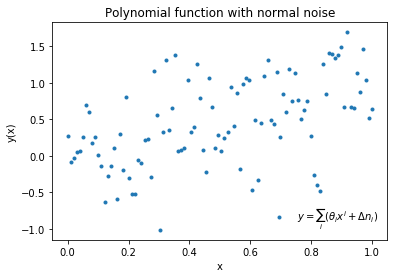

In [3]:
x = np.linspace(0,1,100)                # 100 equally soaced points from 0 to 1
theta = [0,1]                           # polynomial parameter
sigma = 0.5                             # stdv of normal distribution used to generate noise
y = polyModelWithNoise(x,theta,sigma)   # calculate y values

# plot polynomial function with noise
fig, ax = plt.subplots()    
ax.set_title('Polynomial function with normal noise')
ax.plot(x,y,'.',label=r"$y=\sum_i (\theta_i x^i + \Delta n_i)$")
ax.set_xlabel("x")
ax.set_ylabel("y(x)")
ax.legend()

Now we will calculate the gradient of the polynomial function with respect to the parameters $\theta$.

$$\frac{\partial y}{\partial \theta_0}=1    ,\;\;\;\;     \frac{\partial y}{\partial \theta_1}=x,\;\;\;\; \frac{\partial y}{\partial \theta_2}=x^2,\;\;\; ... \;\;\;,\;\;\;\; \frac{\partial y}{\partial \theta_n}=x^n$$

In [4]:
def polyGradient(x,theta):
    '''Returns the gradient of the polynomial function with respect to the parameters theta.
    x: numpy array of x values
    theta: parameters of the polynomial'''
    gradient=[]
    for i in range(len(theta)):
        gradient.append(x**i)
    return np.array(gradient)

We will also define a function to calculate the average chi sqaured value.

In [5]:
def get_avg_fake_chisq(x, theta):
    return np.average((polyModelWithNoise(x,[0,1],0.5)-polyModel(x,theta))**2)

We will now run the Stochastic Gradient Descent algorithm to starting with values of $\theta = [-1,0.5]$ and learning rate 0.5.

In [8]:
numSteps=100                         # Number of steps for minimisation
theta=[-1,0.5]                       # Starting values of theta
eta=0.5                              # 'Learning' rate
thetaArray=np.zeros((numSteps+1,2))  # Array of theta values
thetaArray[0]=theta

for i in range(numSteps):
    x=np.random.rand(10)                                            # 10 random values between 0 and 1
    chiSq=get_avg_fake_chisq(x,theta)                               # calculate chi squared
    # Calculate the difference to true function with theta=[0,1]
    deviation=polyModel(x,theta)-polyModelWithNoise(x,[0,1],0.5)
    # Update values of theta 
    theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
    thetaArray[i+1]=theta

In [9]:
print(thetaArray[-1])

[0.08871989 0.99045598]


Now we will consider a third order polynomial with parameters $\theta=[0,1,2,2]$ using the same noise as before, and we will fit to this curve a first, third and seventh order polynomials using the Stochastic Gradient Descent algorithm.

We will initialise the fit polynomials by arbitrarily assigning them starting values of theta:
- the first order polynomial will have values $\theta=[1,1]$
- the third order polynomial will have values $\theta=[1,1,1,1]$
- the seventh order polynomial will have values $\theta=[1,1,1,1,1,1,1,1]$

We will also plot the third order polynomial data over an expanded x-range: $[-0.5,1.5]$, together with the fit polynomials.

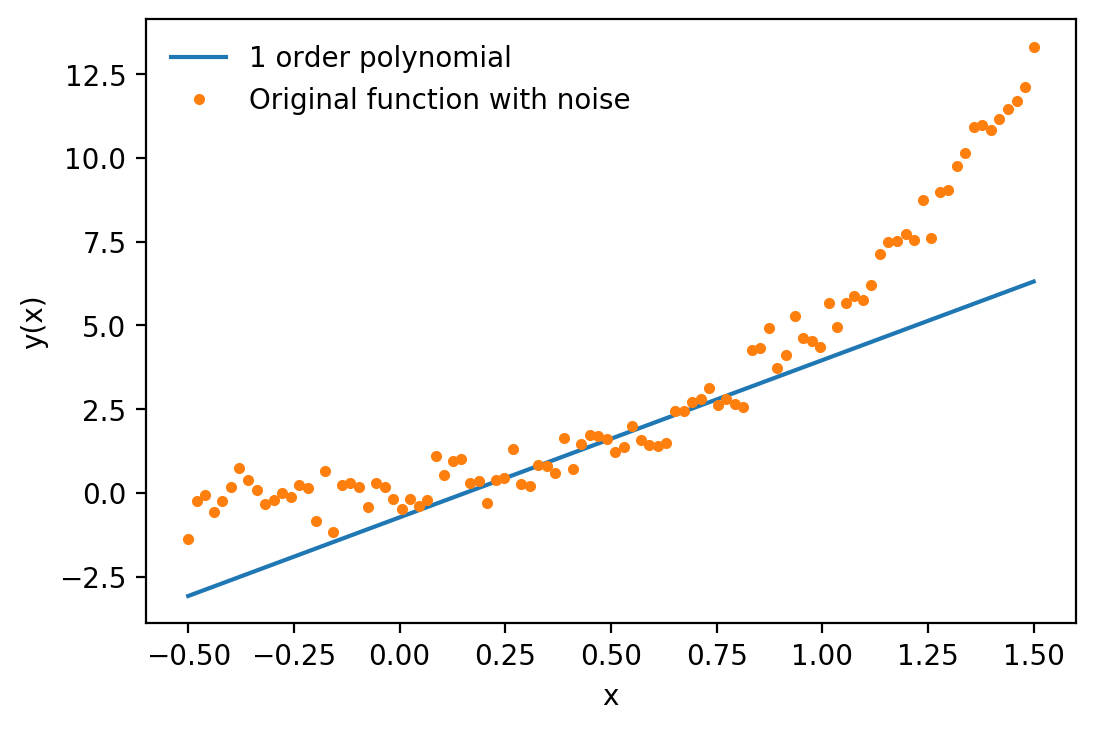

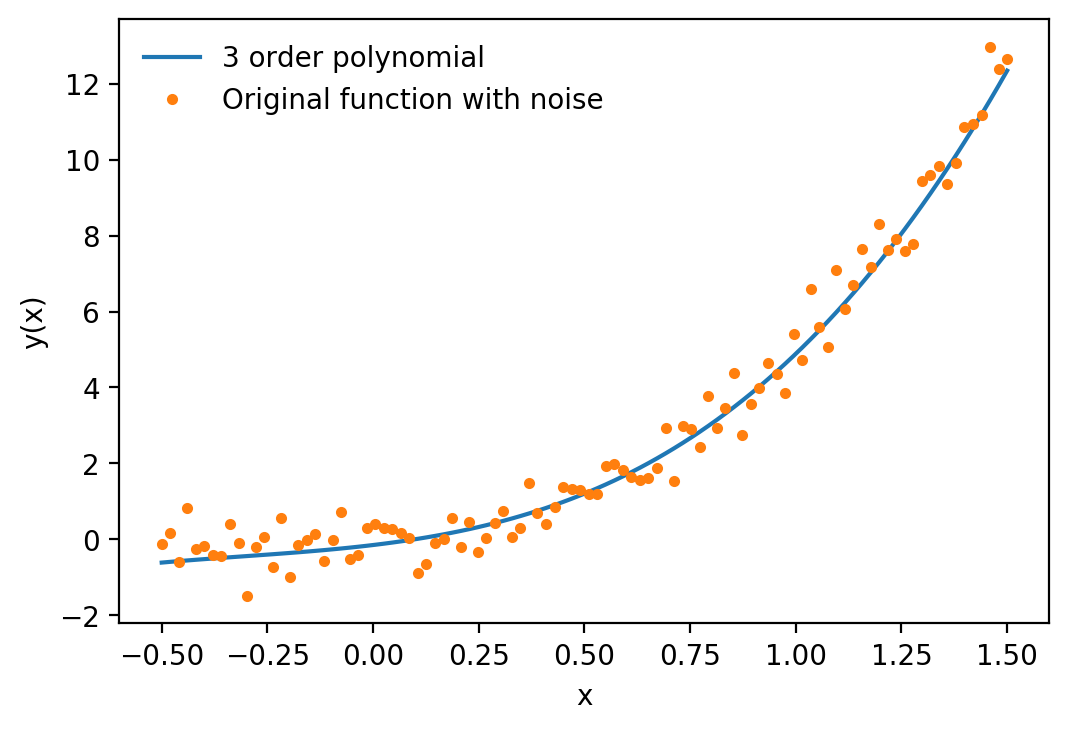

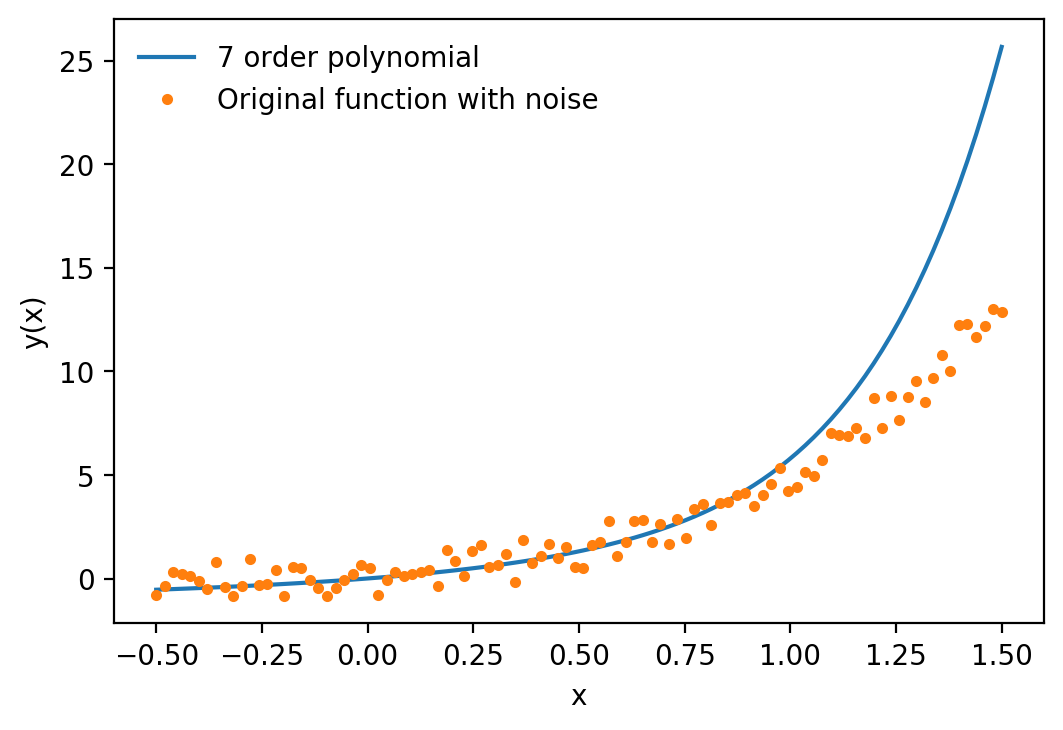

In [129]:
pol_degrees=[1,3,7]        # array containing the degress of the fit polynomials
numSteps=100               # Number of steps for minimisation
eta=0.5                    # 'Learning' rate


for deg in pol_degrees:                     # looping through fit polynomial degrees
    theta=np.ones(deg+1)                    # arbirtarily initislise starting values of theta  
    thetaArray=np.zeros((numSteps+1,deg+1)) # Array of theta values
    thetaArray[0]=theta

    for i in range(numSteps):
        x=np.random.rand(10)                                            # 10 random values between 0 and 1
        chiSq=get_avg_fake_chisq(x,theta)                               # calculate chi squared
        # Calculate the difference to true function with theta=[0,1]
        deviation=polyModel(x,theta)-polyModelWithNoise(x,[0,1,2,2],0.5)
        # Update values of theta 
        theta-=eta*np.average(deviation[None,:]*polyGradient(x,theta),axis=1)
        thetaArray[i+1]=theta
     
    # Plot each fit polynomial together with original noisy function 
    fig, ax = plt.subplots()
    x_plot=np.linspace(-0.5,1.5,100)                             # plot over a wider range (from -0.5 to 1.5)
    y = polyModel(x_plot,thetaArray[-1])                         # array of y values for fit polynomial
    ax.plot(x_plot,y,label='{0} order polynomial'.format(deg))   # plot fit polynomial
    y = polyModelWithNoise(x_plot,[0,1,2,2],0.5)                 # array of y values for original noisy function
    ax.plot(x_plot,y,'.',label=r'Original function with noise')  # plot original noisy function
    ax.set_xlabel("x")
    ax.set_ylabel("y(x)")
    ax.legend() 

As it can be seen from the plots above, when we consider the range $[0,1]$ over which the models have been trained, the polynomials all give a reasonable fit of the original data points, even though it can be seen that the data points do not follow a linear trend, hence the 1st order fit could be already ruled out. When the range of x-values is extended beyond the training range, it can be seen that 7th order fit polynomial diverges from the data points as the value of x increases beyond 1. 

Therefore, as expected, the best fit is given by the third order polynomial, which provides a good representation of the overall trend even beyond the original training range. This happens also because the third order fit has the same order of the polynomial originally used to generate the data points.